In [1]:
# --- Essential Imports ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # For local simulators
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt # For displaying plots

In [2]:
print("Qiskit libraries imported successfully!")
import qiskit
import qiskit_aer
print(f"Qiskit version: {qiskit.__version__}")
print(f"Qiskit Aer version: {qiskit_aer.__version__}")

Qiskit libraries imported successfully!
Qiskit version: 2.1.0
Qiskit Aer version: 0.17.1


In [3]:
# --- Jupyter Magic Command ---
%matplotlib inline

In [4]:

# --- Helper Function to Run and Visualize Superdense Coding ---
def run_superdense_coding(classical_bits_to_send):
    """
    Demonstrates Superdense Coding for a given 2-bit classical message.

    Args:
        classical_bits_to_send (str): A 2-character string representing the
                                      classical bits Alice wants to send (e.g., "00", "01", "10", "11").
    """
    if classical_bits_to_send not in ["00", "01", "10", "11"]:
        raise ValueError("classical_bits_to_send must be '00', '01', '10', or '11'.")

    print(f"\n--- Superdense Coding: Alice wants to send '{classical_bits_to_send}' ---")

    # 1. Initialize Circuit: 2 qubits (Alice's, Bob's), 2 classical bits (for Bob's measurement)
    qc = QuantumCircuit(2, 2)

    # 2. Prepare the Bell Pair (Shared Entanglement)
    # Alice and Bob share a Bell state (e.g., Phi+ = (|00> + |11>)/sqrt(2))
    # This is done by applying a Hadamard to Qubit 0, then a CNOT with Qubit 0 as control and Qubit 1 as target.
    print("Step 1: Preparing Bell Pair (Shared Entanglement)...")
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier() # Add a barrier for visual separation in the circuit diagram

    # Draw circuit after entanglement
    print("Circuit after Bell Pair preparation:")
    qc.draw(output='mpl', style={'backgroundcolor': '#ffffff'})
    plt.show()

    # 3. Alice's Encoding (Applies operations to her qubit based on message)
    print(f"Step 2: Alice encoding '{classical_bits_to_send}' on her qubit (Qubit 0)...")
    if classical_bits_to_send == "00":
        # No operation (Identity)
        pass
    elif classical_bits_to_send == "01":
        qc.z(0) # Apply Pauli-Z gate
    elif classical_bits_to_send == "10":
        qc.x(0) #  Apply Pauli-X (NOT) gate
    elif classical_bits_to_send == "11":
        qc.z(0) # Apply Pauli-Z
        qc.x(0) # Then Pauli-X

    qc.barrier() # Add another barrier

    # Draw circuit after Alice's encoding
    print("Circuit after Alice's encoding:")
    qc.draw(output='mpl', style={'backgroundcolor': '#ffffff'})
    plt.show()

    # 4. Bob's Decoding (Applies operations to both qubits)
    print("Step 3: Bob decoding the message...")
    qc.cx(0, 1) # CNOT with Alice's qubit (0) as control, Bob's (1) as target
    qc.h(0)     # Hadamard on Alice's qubit (0)
    qc.barrier() # Add another barrier

    # 5. Bob's Measurement
    print("Step 4: Bob measuring both qubits...")
    qc.measure([0, 1], [0, 1]) # Measure both qubits into classical bits

    # Draw the final circuit
    print("\nFinal Superdense Coding Circuit:")
    qc.draw(output='mpl', style={'backgroundcolor': '#ffffff'})
    plt.show()

    # 6. Simulate and Get Results
    print("Simulating the circuit...")
    simulator = Aer.get_backend('qasm_simulator')
    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc, shots=1024) # Run many shots to see probabilistic outcomes
    result = job.result()
    counts = result.get_counts(qc)

    print(f"\nMeasurement outcomes (counts): {counts}")

    # 7. Visualize Results
    print("Plotting results histogram:")
    plot_histogram(counts)
    plt.show()

    # Verify the result
    # The expected outcome should be the classical bits Alice sent,
    # appearing with ~100% probability.
    expected_outcome = classical_bits_to_send
    if expected_outcome in counts and counts[expected_outcome] > 0.9 * 1024:
        print(f"\nSUCCESS! Bob measured '{expected_outcome}', which matches Alice's message.")
    else:
        print(f"\nVerification failed. Expected '{expected_outcome}', got {counts}.")



--- Superdense Coding: Alice wants to send '00' ---
Step 1: Preparing Bell Pair (Shared Entanglement)...
Circuit after Bell Pair preparation:


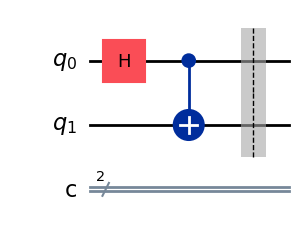

Step 2: Alice encoding '00' on her qubit (Qubit 0)...
Circuit after Alice's encoding:


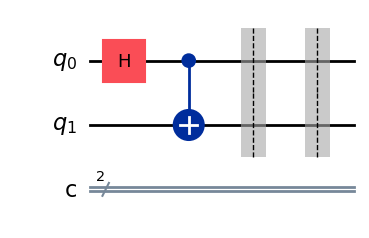

Step 3: Bob decoding the message...
Step 4: Bob measuring both qubits...

Final Superdense Coding Circuit:


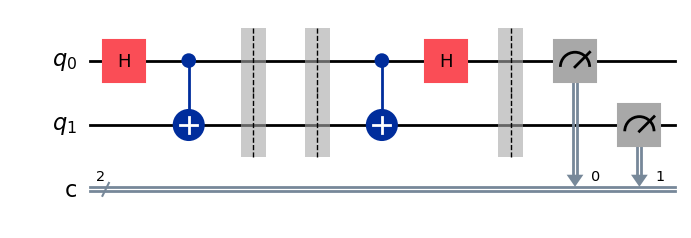

Simulating the circuit...

Measurement outcomes (counts): {'00': 1024}
Plotting results histogram:


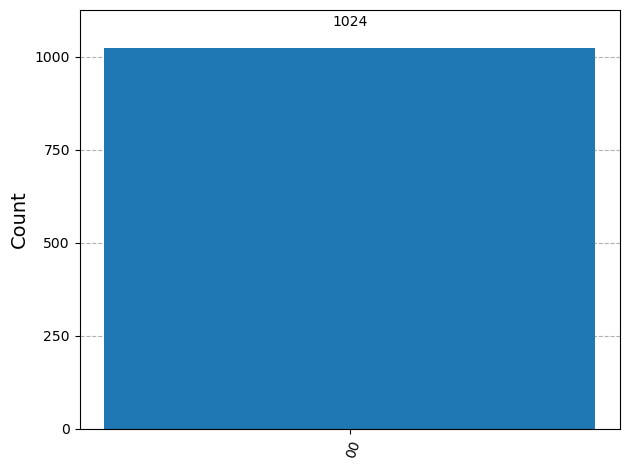


SUCCESS! Bob measured '00', which matches Alice's message.


In [5]:
# Message 1: Alice sends "00"
run_superdense_coding("00")


--- Superdense Coding: Alice wants to send '01' ---
Step 1: Preparing Bell Pair (Shared Entanglement)...
Circuit after Bell Pair preparation:


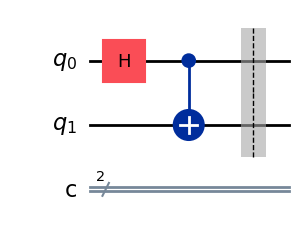

Step 2: Alice encoding '01' on her qubit (Qubit 0)...
Circuit after Alice's encoding:


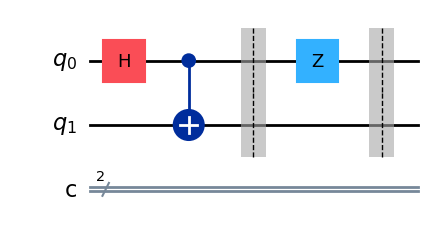

Step 3: Bob decoding the message...
Step 4: Bob measuring both qubits...

Final Superdense Coding Circuit:


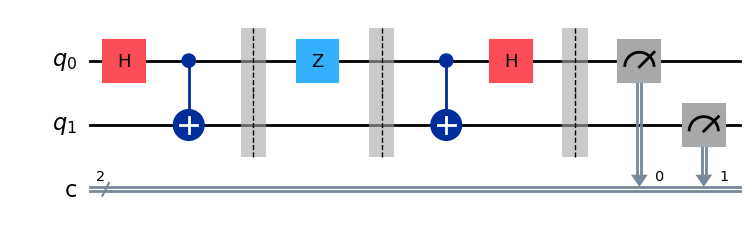

Simulating the circuit...

Measurement outcomes (counts): {'01': 1024}
Plotting results histogram:


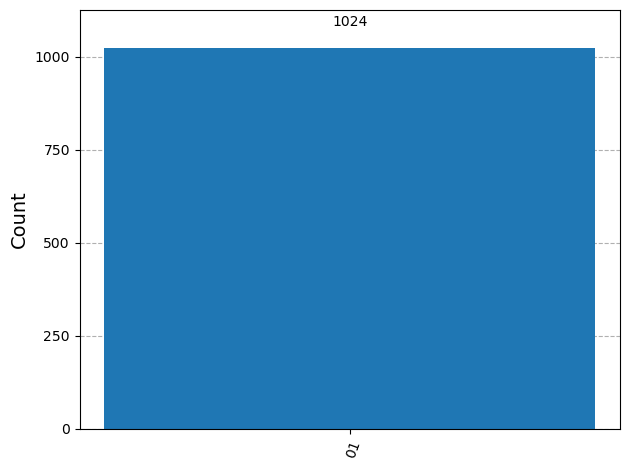


SUCCESS! Bob measured '01', which matches Alice's message.


In [6]:
# Message 2: Alice sends "01"
run_superdense_coding("01")


--- Superdense Coding: Alice wants to send '10' ---
Step 1: Preparing Bell Pair (Shared Entanglement)...
Circuit after Bell Pair preparation:


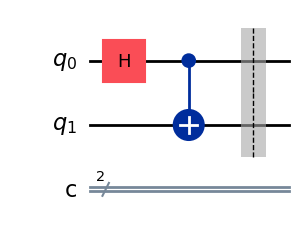

Step 2: Alice encoding '10' on her qubit (Qubit 0)...
Circuit after Alice's encoding:


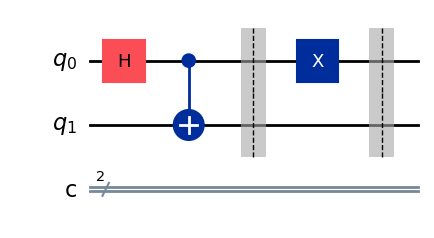

Step 3: Bob decoding the message...
Step 4: Bob measuring both qubits...

Final Superdense Coding Circuit:


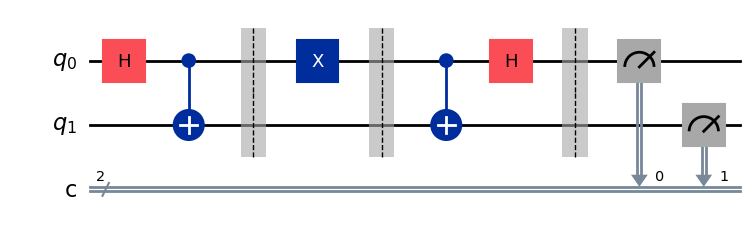

Simulating the circuit...

Measurement outcomes (counts): {'10': 1024}
Plotting results histogram:


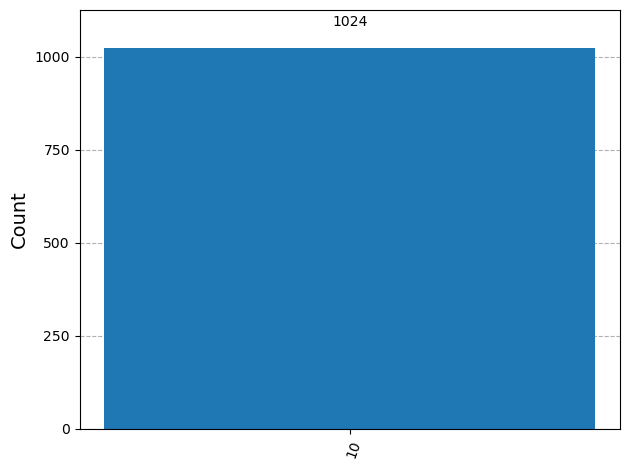


SUCCESS! Bob measured '10', which matches Alice's message.


In [7]:
# Message 3: Alice sends "10"
run_superdense_coding("10")


--- Superdense Coding: Alice wants to send '11' ---
Step 1: Preparing Bell Pair (Shared Entanglement)...
Circuit after Bell Pair preparation:


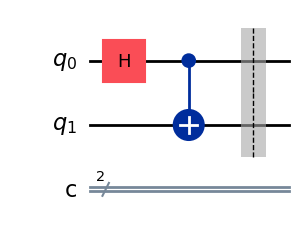

In [ ]:
# Message 4: Alice sends "11"
run_superdense_coding("11")